# **Data Collection for Dog Breed Classification**

## Objectives

* Fetch the dog breed classification dataset from Kaggle and save it as raw data.
* Inspect the image data and set up directories for processed datasets.

## Inputs

*   Kaggle JSON file for authentication.

## Outputs

- `outputs/` folder is created for future use

## Additional Comments


* In the workplace, **projects are not done using Kaggle data**, but instead, the data comes from multiple data sources that may be hosted internally (like in a data warehouse) or outside your company. For this project learning context, we are fetching the data from Kaggle.

* Another aspect is that in the workplace, the **data has never been pushed to a public repository** due to security reasons. Just for this project learning context, we are hosting the data in a public repo.


---

# Install python packages in the notebooks

In [1]:
%pip install -r ../requirements.txt
%pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.1 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chdir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("New current directory set:", os.getcwd())

New current directory set: /home/jaaz/Desktop/project-5/TailTeller


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/home/jaaz/Desktop/project-5/TailTeller'

# Fetch data from Kaggle

Install Kaggle package to fetch data

In [5]:
%pip install kaggle==1.5.12

Note: you may need to restart the kernel to use updated packages.


In the Data Collection Section notebook we studied how to download a **JSON file (authentication token)** from Kaggle. That is needed to authenticate Kaggle to download data in this session.
* You will need **kaggle.json** available
* In case you don't have it, please refer to the Data Collection > Data Collection Unit 1: Getting Your Data notebook.


The next step is to manually drag the kaggle.json into the session

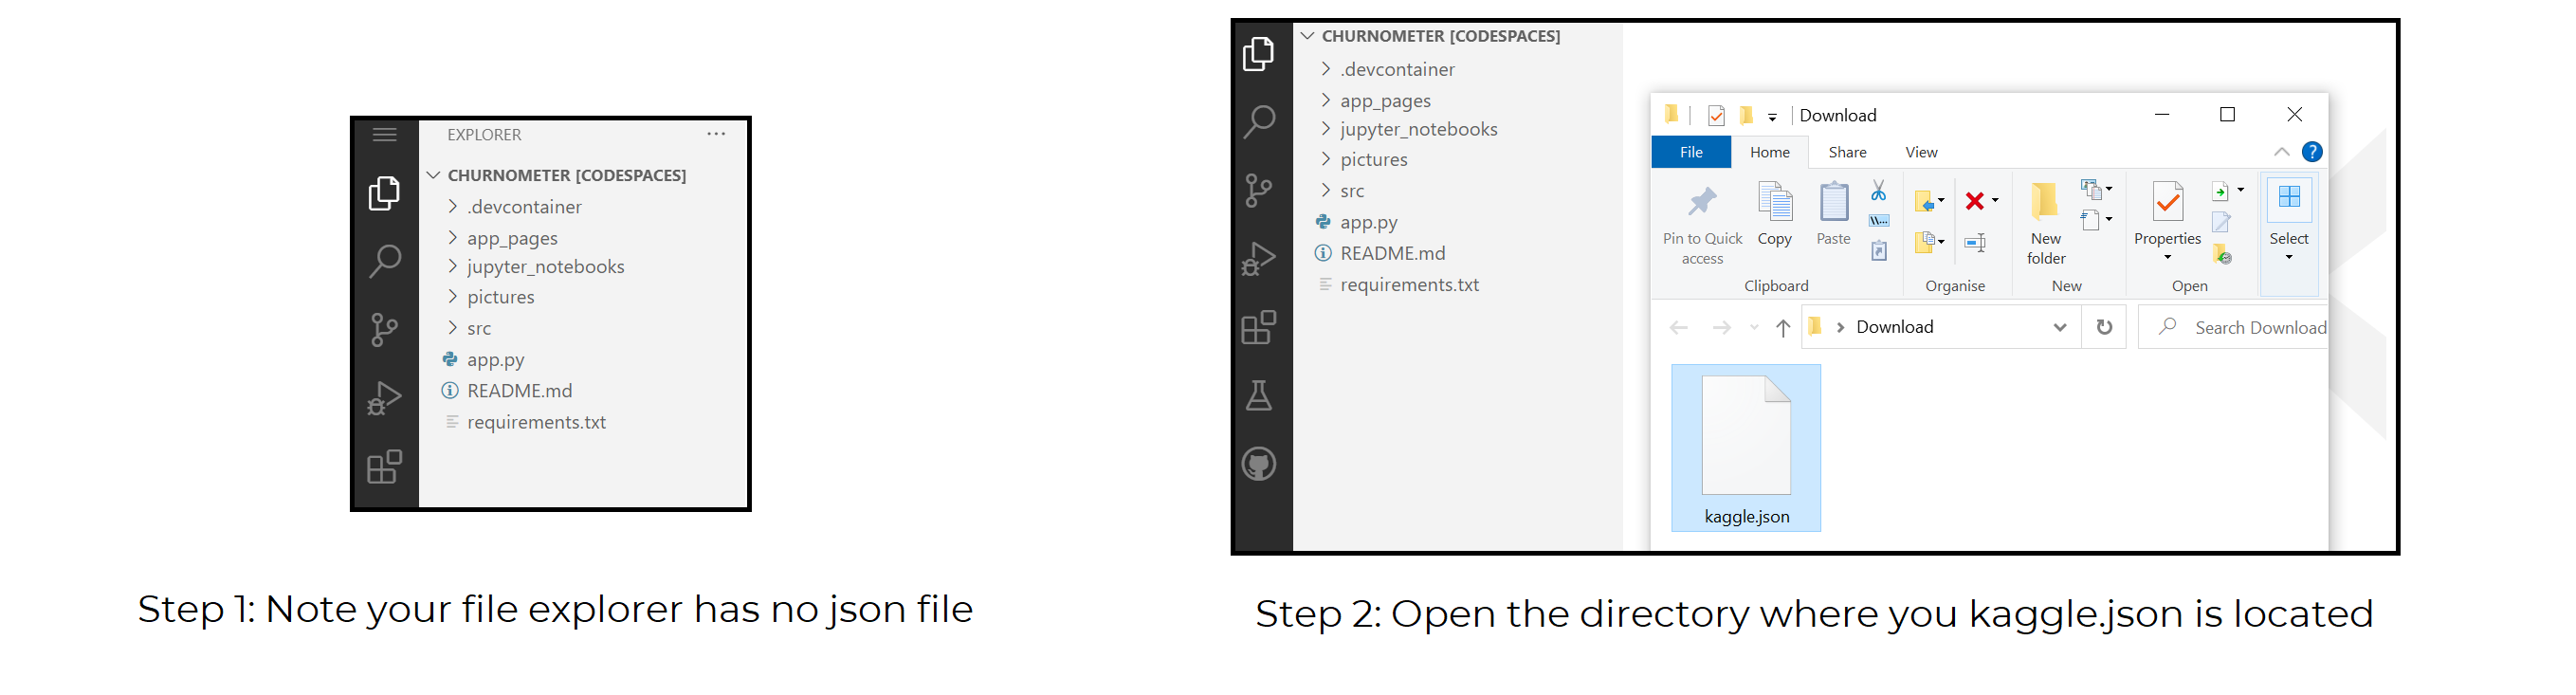

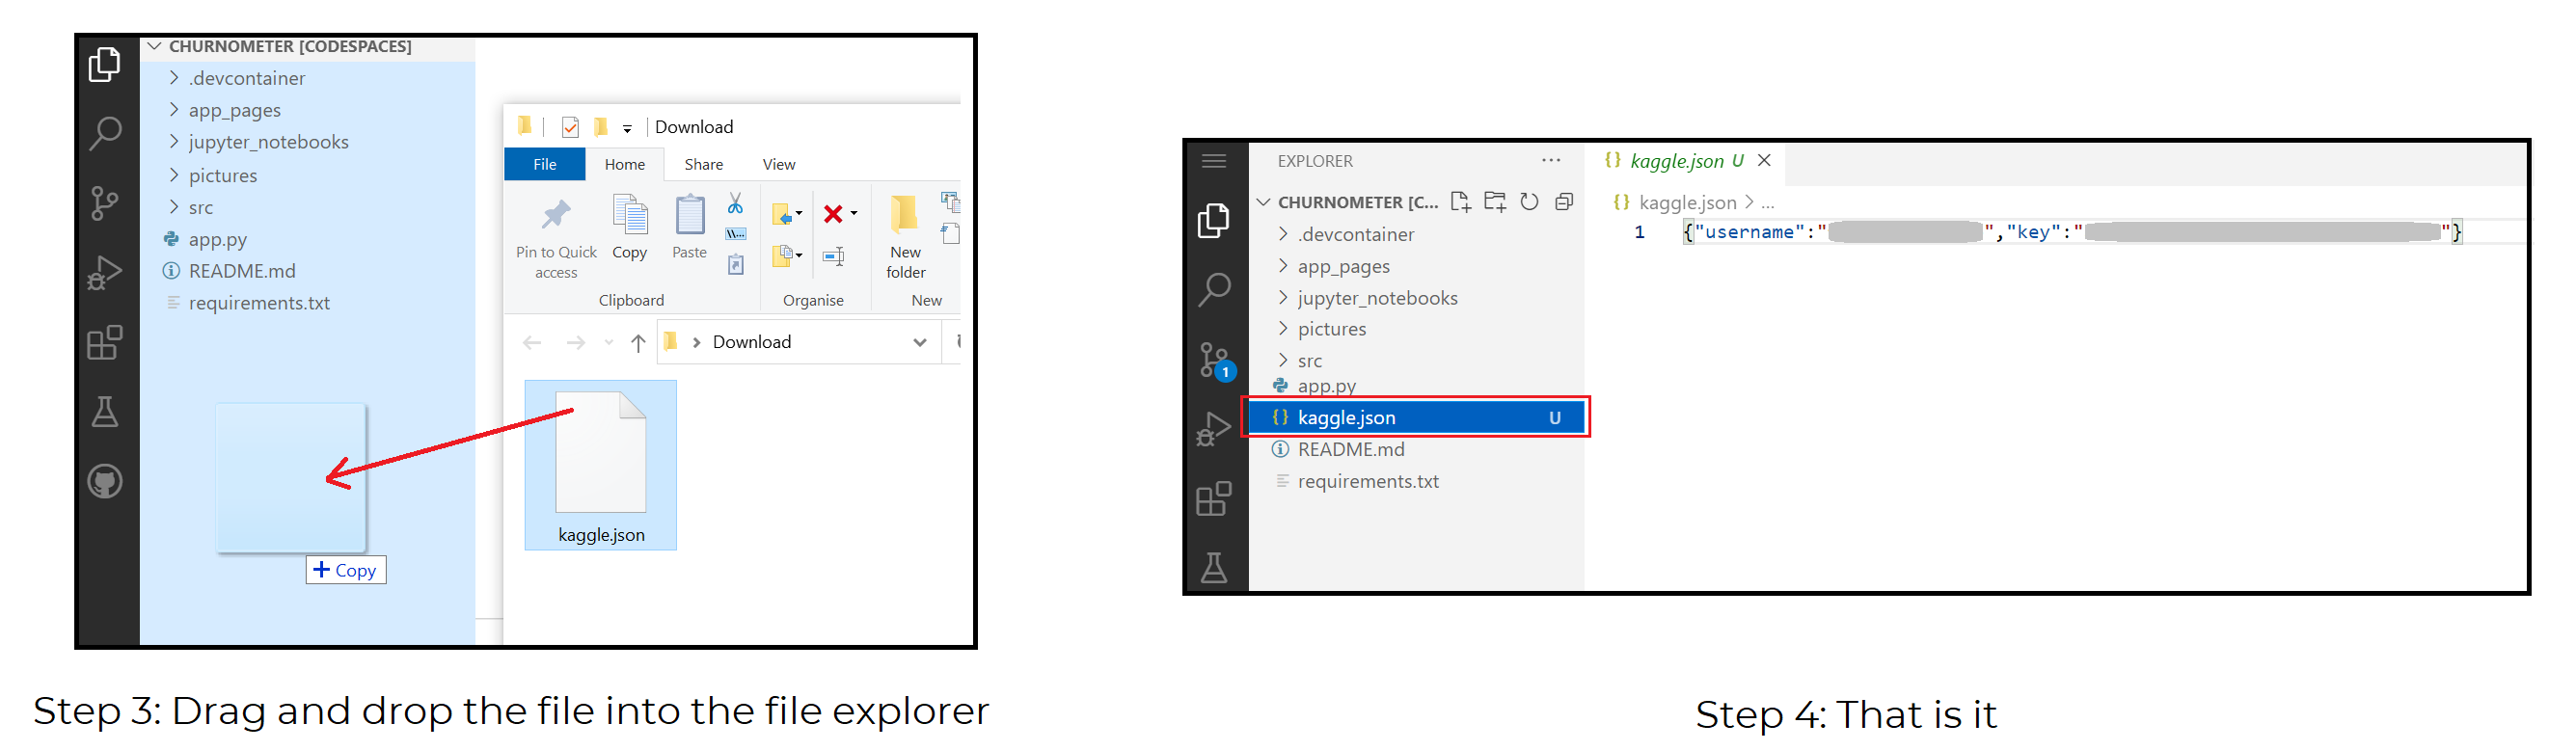

Once you do that run the cell below, so the token is recognized in the session

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
!chmod 600 kaggle.json

Get the dataset path from the Kaggle url
* When you are viewing the dataset at Kaggle, check what is after https://www.kaggle.com/ .

Define the Kaggle dataset, and destination folder and download it.

In [7]:
KaggleDatasetPath = "dog-breed-identification"
DestinationFolder = "images/"   
!kaggle competitions download -c {KaggleDatasetPath} -p {DestinationFolder}

100%|███████████████████████████████████████▊| 688M/691M [00:21<00:00, 38.8MB/s]
100%|████████████████████████████████████████| 691M/691M [00:21<00:00, 33.3MB/s]


Unzip the downloaded file, delete the zip file and delete the kaggle.json file

In [18]:
!unzip {DestinationFolder}/*.zip -d {DestinationFolder} && rm {DestinationFolder}/*.zip && rm kaggle.json


Archive:  images//dog-breed-identification.zip
  inflating: images/labels.csv       
  inflating: images/sample_submission.csv  
replace images/test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


---

# Load and Inspect Kaggle data

Manually move labels.csv to the root of the project.

In [8]:
import pandas as pd
df = pd.read_csv(f"labels.csv")
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


DataFrame Summary

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


# Load and Inspect Image Data

We will use OpenCV and Matplotlib to load and view some of the images to understand what kind of data we are dealing with.

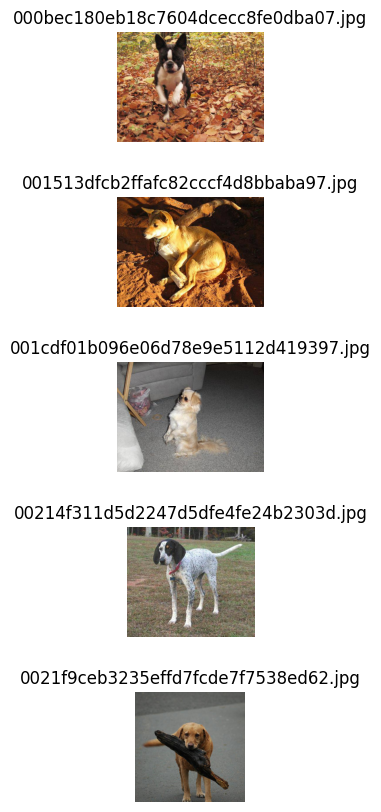

In [12]:
import cv2
from matplotlib import pyplot as plt

def display_images(images_path, num_images=5):
    fig, axes = plt.subplots(num_images, 1, figsize=(20, 10))
    files = os.listdir(images_path)[:num_images]
    for i, file in enumerate(files):
        img_path = os.path.join(images_path, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].set_title(file)
        axes[i].axis('off')
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# Display images from the training dataset
display_images('images/train/')


Create the output folder

In [5]:
import os

# Define the path for the output folder
output_path = 'outputs/'

# Check if the directory exists
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print(f"Directory '{output_path}' created")
else:
    print(f"Directory '{output_path}' already exists")

Directory 'outputs/' created


# Push files to Repo

In [ ]:
!git add .
!git commit -m "Set up initial data collection and inspection for dog breed classification"
!git push origin main